In [1]:
%config IPCompleter.use_jedi = False
import tensorflow as tf
from src.custom_layers import FasterCosSimConv2D, MaxAbsPool2D
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [3]:
cosine_model = tf.keras.Sequential([tf.keras.layers.Input((64,64,3)), 
                                    FasterCosSimConv2D(32, 4, 1, padding="SAME"), MaxAbsPool2D(2), 
                                    FasterCosSimConv2D(64, 4, 1, padding="SAME"), MaxAbsPool2D(2),
                                    FasterCosSimConv2D(128, 4, 1, padding="SAME"), MaxAbsPool2D(2),
                                    tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(1028), 
                                    tf.keras.layers.Dense(10)])

In [4]:
cosine_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
faster_cos_sim_conv2d (Faste (None, 64, 64, 32)        1601      
_________________________________________________________________
max_abs_pool2d (MaxAbsPool2D (None, 32, 32, 32)        0         
_________________________________________________________________
faster_cos_sim_conv2d_1 (Fas (None, 32, 32, 64)        32897     
_________________________________________________________________
max_abs_pool2d_1 (MaxAbsPool (None, 16, 16, 64)        0         
_________________________________________________________________
faster_cos_sim_conv2d_2 (Fas (None, 16, 16, 128)       131329    
_________________________________________________________________
max_abs_pool2d_2 (MaxAbsPool (None, 8, 8, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0

In [5]:
def adjust_image(x):
    return tf.image.resize(x["image"]/255, (64,64)), x["label"]

ds_iter = tfds.load("imagenette")["train"].shuffle(1000).map(lambda x: adjust_image(x)).batch(64)

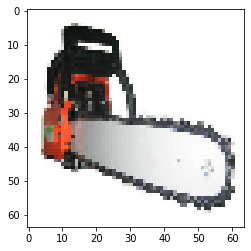

In [6]:
for img,lab in ds_iter:
    break
plt.imshow(img[0])
plt.show()


In [7]:
cosine_model.compile(tf.keras.optimizers.Adam(0.000005), 
                     loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                      metrics=["accuracy"])

In [13]:
cosine_model.fit(ds_iter, epochs=10)

Epoch 1/10
148/148 [==============================] - 17s 113ms/step - loss: 2.1035 - accuracy: 0.3040
Epoch 2/10
148/148 [==============================] - 17s 112ms/step - loss: 1.9482 - accuracy: 0.3567
Epoch 3/10
148/148 [==============================] - 17s 113ms/step - loss: 1.8529 - accuracy: 0.3863
Epoch 4/10
148/148 [==============================] - 17s 112ms/step - loss: 1.7912 - accuracy: 0.4054
Epoch 5/10
148/148 [==============================] - 18s 115ms/step - loss: 1.7384 - accuracy: 0.4269
Epoch 6/10
148/148 [==============================] - 17s 115ms/step - loss: 1.6694 - accuracy: 0.4479
Epoch 7/10
148/148 [==============================] - 17s 115ms/step - loss: 1.6046 - accuracy: 0.4651
Epoch 8/10
148/148 [==============================] - 17s 115ms/step - loss: 1.5392 - accuracy: 0.4907
Epoch 9/10
148/148 [==============================] - 17s 115ms/step - loss: 1.4882 - accuracy: 0.5070
Epoch 10/10
148/148 [==============================] - 17s 114ms/step - l

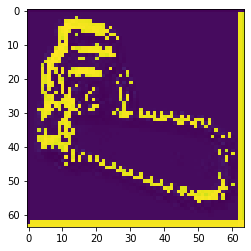

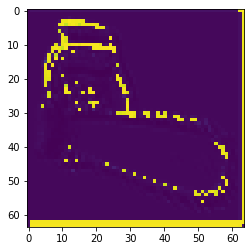

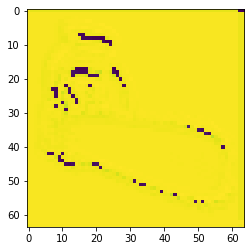

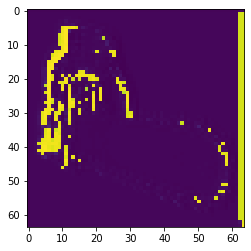

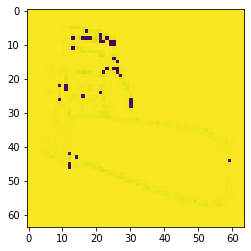

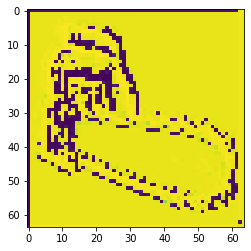

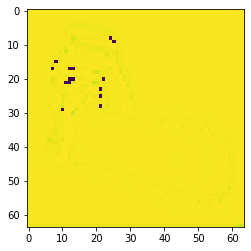

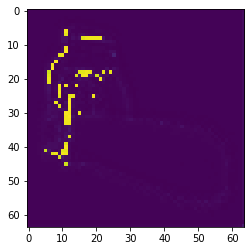

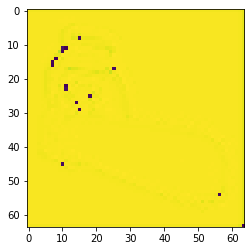

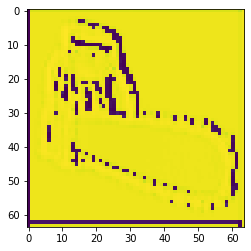

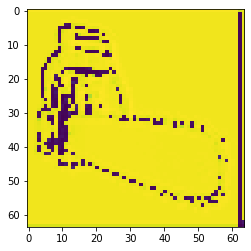

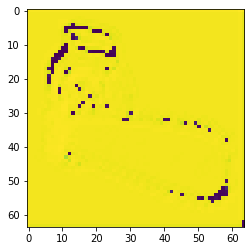

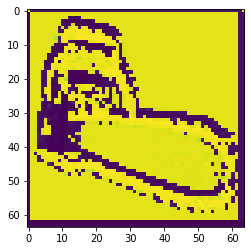

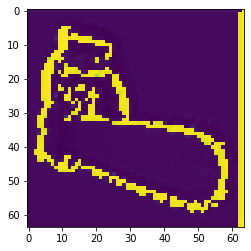

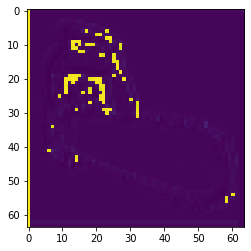

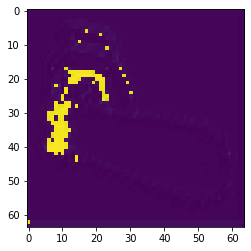

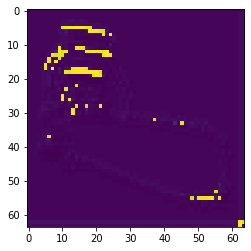

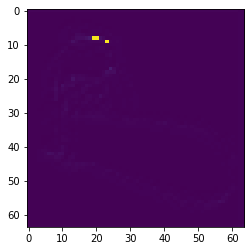

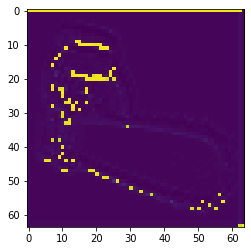

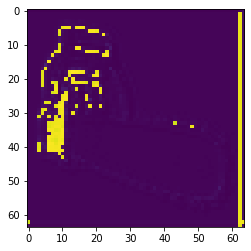

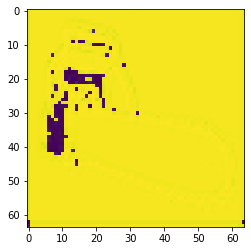

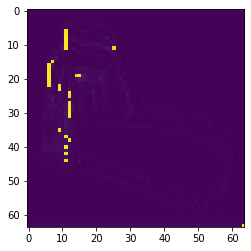

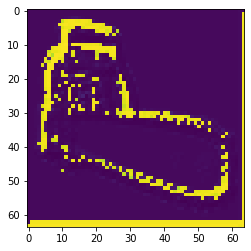

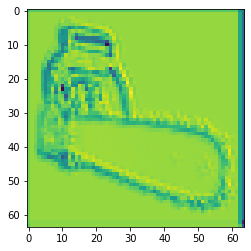

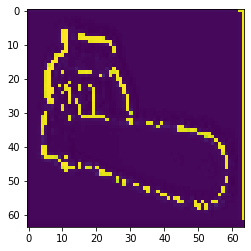

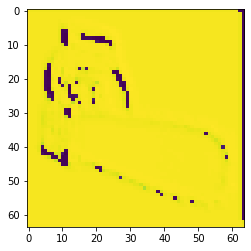

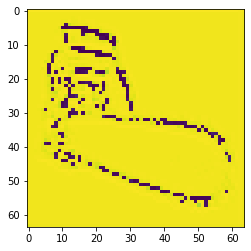

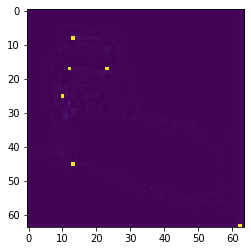

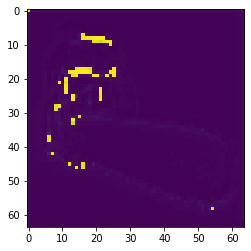

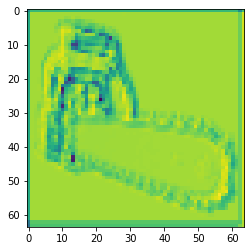

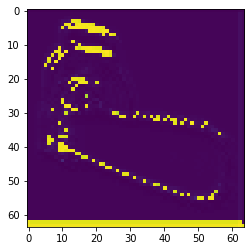

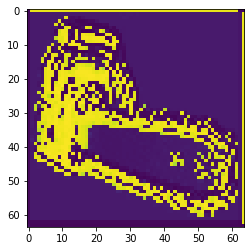

In [19]:
b = tf.keras.Model(cosine_model.inputs, cosine_model.get_layer("faster_cos_sim_conv2d").output)(img)
for i in range(0, 32):
    plt.imshow(b[0,:,:,i])
    plt.show()